In this script i will generate from the vcf files from slim a table of allele counts per snp for all the populations as an input for baypass 
so the ouput should be, each row a snp positions and each colum the number of population X 2 since the first column is allele ref, the second alt allele

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import math 
import os

import allel
import subprocess

In [33]:
### create a dictionary where 1 dataframe containing all the replicates for each optima is saved 

optimas_replicates = {}
#  take all the vcf files in the folder 
for optima in os.listdir( 'vcf_slim/'):
    optima_subp = os.listdir(f'vcf_slim/{optima}/')
    subps = [i for i in optima_subp if '.vcf' in i ]
    name = f"{optima}"
    all_subp = pd.DataFrame()
    for subp in subps:
        vcf = allel.read_vcf(f'vcf_slim/{optima}/' + subp)

        genotypes = allel.GenotypeArray(vcf['calldata/GT'])
        ref_allele_counts = genotypes.count_alleles()[:, 0]
        alt_allele_counts = genotypes.count_alleles()[:, 1]

        subp0 = pd.DataFrame(data ={'ref_'+ subp[:-4]:ref_allele_counts, 'alt_'+ subp[:-4]: alt_allele_counts}, index = vcf['variants/POS'], )
        all_subp = pd.concat([all_subp, subp0], axis=1)
    optimas_replicates[name] = all_subp

In [35]:
optima0 = optimas_replicates['optima0'].copy()

In [48]:
only_alt = [i for i in optima0.columns if 'alt' in i]

In [46]:
optima0_alt = optima0[only_alt]

In [52]:
optima0_alt = optima0_alt.transpose().fillna(0)

In [57]:
np.isinf(optima0_alt).any().any()

False

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

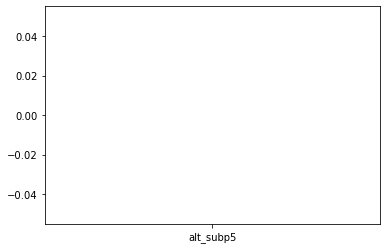

In [53]:
sns.lineplot(data=optima0_alt)

In [95]:
## order manually because lazy

subps = ['subp0.vcf',
 'subp1.vcf','subp2.vcf',
 'subp3.vcf',
 'subp4.vcf',
 'subp5.vcf',
 'subp6.vcf',
 'subp7.vcf',
 'subp8.vcf',
 'subp9.vcf','subp10.vcf',
 'subp11.vcf',
 'subp12.vcf',
 'subp13.vcf',
 'subp14.vcf',
 'subp15.vcf',]

In [96]:
## so basically i will generate one table for eaach subpop where al the snps where they are variant will be named 
## and then i will merge all these tables getting the total variation 
all_subp = pd.DataFrame()
for subp in subps:
    vcf = allel.read_vcf('vcf_slim/' + subp)

    genotypes = allel.GenotypeArray(vcf['calldata/GT'])
    ref_allele_counts = genotypes.count_alleles()[:, 0]
    alt_allele_counts = genotypes.count_alleles()[:, 1]

    subp0 = pd.DataFrame(data ={'ref_'+ subp[:-4]:ref_allele_counts, 'alt_'+ subp[:-4]: alt_allele_counts}, index = vcf['variants/POS'], )
    all_subp = pd.concat([all_subp, subp0], axis=1)


## be careful here, because this are the positions that are variant, but the 

In [97]:
all_subp

,ref_subp0,alt_subp0,ref_subp1,alt_subp1,ref_subp2,alt_subp2,ref_subp3,alt_subp3,ref_subp4,alt_subp4,...,ref_subp11,alt_subp11,ref_subp12,alt_subp12,ref_subp13,alt_subp13,ref_subp14,alt_subp14,ref_subp15,alt_subp15
6063,162.0,838.0,134.0,866.0,141.0,859.0,119.0,881.0,239.0,293.0,...,117.0,883.0,68.0,932.0,146.0,854.0,23.0,883.0,283.0,717.0
13538,520.0,480.0,462.0,538.0,318.0,682.0,528.0,472.0,259.0,273.0,...,430.0,570.0,92.0,908.0,485.0,515.0,245.0,661.0,662.0,338.0
19532,208.0,792.0,260.0,740.0,157.0,843.0,132.0,868.0,239.0,293.0,...,177.0,823.0,68.0,932.0,276.0,724.0,123.0,783.0,438.0,562.0
19931,975.0,25.0,840.0,160.0,911.0,89.0,906.0,94.0,NaN,NaN,...,838.0,162.0,689.0,311.0,866.0,134.0,894.0,12.0,945.0,55.0
23006,974.0,26.0,825.0,175.0,881.0,119.0,972.0,28.0,NaN,NaN,...,999.0,1.0,876.0,124.0,936.0,64.0,NaN,NaN,882.0,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28167692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,982.0,18.0
30057156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,982.0,18.0
30065201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,982.0,18.0
30325819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,982.0,18.0


In [107]:
subps = all_subp.columns
subps = [i for i in subps if 'ref_' in i]

In [108]:
## calculate the pool size of each subpop
pool_size = []
for subp in subps:
    leng = len(all_subp[subp].dropna())
    pool_size.append(leng)

In [111]:

## now create final dataframe 
## doing this just to fin the right columns 
subps = [i.replace('ref_', '') for i in subps]

In [112]:
pool_size = pd.Series(pool_size, subps)
for col in all_subp.columns:
    if 'ref_' in col: 
        all_subp.loc[:,col] = all_subp.loc[:, col].fillna(pool_size.loc[col[4:]])
    else:
        all_subp.loc[:,col] = all_subp.loc[:, col].fillna(0)

In [117]:
all_subp = all_subp.astype(int)

In [118]:
## check if there are sites where all the subpop are the same 
for col in all_subp.columns:
    if all_subp[col].nunique() == 1:
        print(f"Column {col} has the same value for all the rows.")

        ## all good

In [119]:
all_subp.to_csv('allele_counts_slim_full_cov.csv')

## ok so my final talbe has 10933 variants. this means that all the others, like 9 thousands are all equal to teh reference and there is no new information there 

In [5]:
allele_counts_slim_full_cov = pd.read_csv('allele_counts_slim_full_cov.csv')

In [8]:
## for each subpop how many sites are equals? 

allele_counts_slim_full_cov['ref_subp0'].value_counts()

4972    5961
966      193
985      153
952      143
980      135
        ... 
161        1
736        1
74         1
414        1
162        1
Name: ref_subp0, Length: 773, dtype: int64

In [9]:
allele_counts_slim_full_cov

,Unnamed: 0,ref_subp0,alt_subp0,ref_subp1,alt_subp1,ref_subp2,alt_subp2,ref_subp3,alt_subp3,ref_subp4,...,ref_subp11,alt_subp11,ref_subp12,alt_subp12,ref_subp13,alt_subp13,ref_subp14,alt_subp14,ref_subp15,alt_subp15
0,6063,162,838,134,866,141,859,119,881,239,...,117,883,68,932,146,854,23,883,283,717
1,13538,520,480,462,538,318,682,528,472,259,...,430,570,92,908,485,515,245,661,662,338
2,19532,208,792,260,740,157,843,132,868,239,...,177,823,68,932,276,724,123,783,438,562
3,19931,975,25,840,160,911,89,906,94,2770,...,838,162,689,311,866,134,894,12,945,55
4,23006,974,26,825,175,881,119,972,28,2770,...,999,1,876,124,936,64,3499,0,882,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10928,28167692,4972,0,5335,0,5422,0,5458,0,2770,...,5749,0,4788,0,5034,0,3499,0,982,18
10929,30057156,4972,0,5335,0,5422,0,5458,0,2770,...,5749,0,4788,0,5034,0,3499,0,982,18
10930,30065201,4972,0,5335,0,5422,0,5458,0,2770,...,5749,0,4788,0,5034,0,3499,0,982,18
10931,30325819,4972,0,5335,0,5422,0,5458,0,2770,...,5749,0,4788,0,5034,0,3499,0,982,18
